# SVC : Sign Language Digits

## We load and shape our data

In [19]:
import numpy as np
X = np.load('data/X.npy')
Y = np.load('data/Y.npy')
X = X.reshape(2062, 64, 64)
X = np.stack((X, X, X), axis=3)
X.shape

(2062, 64, 64, 3)

## We split ours data in train and dev set with a fixed seed

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.shape

(1443, 64, 64, 3)

## We reshape the x in a 2d array 

In [21]:
from keras.applications import MobileNet
mn_base = MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64,3), classes=10)
for layer in mn_base.layers[:50]:    # on gele les parametres d'entrainement du modele mn_base
    layer.trainable = False

C:\Users\utilisateur\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [22]:
# Info sur vgg_base
# mn_base.layers
len(mn_base.layers)
# mn_base.summary()

87

## Initiate a model

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D

In [24]:
model = Sequential() 
model.add(mn_base)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax'))

In [25]:
from keras.optimizers import SGD
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer='adamax', 
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(x_dev,y_dev), shuffle=True)

Train on 1443 samples, validate on 619 samples
Epoch 1/15
1443/1443 [==============================] - 33s 23ms/step - loss: 2.8051 - accuracy: 0.2100 - val_loss: 2.1749 - val_accuracy: 0.2730
Epoch 2/15
1443/1443 [==============================] - 27s 19ms/step - loss: 1.9623 - accuracy: 0.2703 - val_loss: 1.9246 - val_accuracy: 0.4249
Epoch 3/15
1443/1443 [==============================] - 29s 20ms/step - loss: 1.8349 - accuracy: 0.3243 - val_loss: 1.8599 - val_accuracy: 0.3570
Epoch 4/15
1443/1443 [==============================] - 28s 20ms/step - loss: 1.7143 - accuracy: 0.3659 - val_loss: 1.8690 - val_accuracy: 0.3748
Epoch 5/15
1443/1443 [==============================] - 27s 19ms/step - loss: 1.6206 - accuracy: 0.3756 - val_loss: 1.7549 - val_accuracy: 0.4006
Epoch 6/15
1443/1443 [==============================] - 28s 19ms/step - loss: 1.5511 - accuracy: 0.4061 - val_loss: 1.7653 - val_accuracy: 0.3813
Epoch 7/15
1443/1443 [==============================] - 26s 18ms/step - loss:

In [27]:
yhat = model.predict(x_dev)

In [28]:
import pandas as pd
from pandas import DataFrame
df = DataFrame(yhat)
df

,0,1,2,3,4,5,6,7,8,9
0,4.574367e-03,7.890855e-01,1.741875e-03,1.001703e-01,3.683139e-03,1.136672e-02,7.362024e-02,0.000957,1.398559e-02,0.000815
1,1.605967e-10,1.634809e-12,3.154676e-09,7.096783e-11,1.523065e-09,8.469746e-11,3.122367e-10,0.000003,3.924701e-10,0.999997
2,3.497797e-02,2.416698e-01,8.489125e-02,5.769776e-02,1.861505e-01,9.811297e-02,5.932048e-02,0.072913,1.014193e-01,0.062847
3,6.288915e-06,2.270283e-07,1.677756e-05,1.271342e-06,1.103612e-05,1.796705e-06,3.154747e-06,0.000621,1.835274e-06,0.999336
4,8.062939e-02,1.613808e-01,7.511082e-02,6.501303e-02,2.426203e-01,6.731687e-02,5.490712e-02,0.061198,1.228402e-01,0.068983
...,...,...,...,...,...,...,...,...,...,...
614,8.132435e-03,4.618424e-01,4.985399e-03,1.020928e-01,1.166536e-01,9.529877e-03,9.934276e-02,0.003016,1.874708e-01,0.006934
615,2.935915e-02,3.874110e-02,2.886439e-02,4.877743e-02,3.570353e-02,5.407830e-02,1.725967e-02,0.319614,2.821099e-02,0.399392
616,5.598523e-03,2.541902e-01,5.545001e-03,1.921193e-01,2.902955e-03,3.265041e-02,4.773314e-01,0.001824,2.629231e-02,0.001546
617,2.835255e-02,9.045789e-02,5.387576e-02,1.834093e-01,4.965771e-02,1.199171e-01,3.508073e-01,0.023371,7.495367e-02,0.025198


In [29]:
df['Class'] = df.iloc[:,:10].idxmax(axis = 1) 
df

,0,1,2,3,4,5,6,7,8,9,Class
0,4.574367e-03,7.890855e-01,1.741875e-03,1.001703e-01,3.683139e-03,1.136672e-02,7.362024e-02,0.000957,1.398559e-02,0.000815,1
1,1.605967e-10,1.634809e-12,3.154676e-09,7.096783e-11,1.523065e-09,8.469746e-11,3.122367e-10,0.000003,3.924701e-10,0.999997,9
2,3.497797e-02,2.416698e-01,8.489125e-02,5.769776e-02,1.861505e-01,9.811297e-02,5.932048e-02,0.072913,1.014193e-01,0.062847,1
3,6.288915e-06,2.270283e-07,1.677756e-05,1.271342e-06,1.103612e-05,1.796705e-06,3.154747e-06,0.000621,1.835274e-06,0.999336,9
4,8.062939e-02,1.613808e-01,7.511082e-02,6.501303e-02,2.426203e-01,6.731687e-02,5.490712e-02,0.061198,1.228402e-01,0.068983,4
...,...,...,...,...,...,...,...,...,...,...,...
614,8.132435e-03,4.618424e-01,4.985399e-03,1.020928e-01,1.166536e-01,9.529877e-03,9.934276e-02,0.003016,1.874708e-01,0.006934,1
615,2.935915e-02,3.874110e-02,2.886439e-02,4.877743e-02,3.570353e-02,5.407830e-02,1.725967e-02,0.319614,2.821099e-02,0.399392,9
616,5.598523e-03,2.541902e-01,5.545001e-03,1.921193e-01,2.902955e-03,3.265041e-02,4.773314e-01,0.001824,2.629231e-02,0.001546,6
617,2.835255e-02,9.045789e-02,5.387576e-02,1.834093e-01,4.965771e-02,1.199171e-01,3.508073e-01,0.023371,7.495367e-02,0.025198,6


In [30]:
Y_predict = df['Class']

In [31]:
y_dev_flat = [list(y).index(1) for y in y_dev]  # permet de faire une liste de valeurs de 0 à 9, pour avoir la meme structure que Y_predict

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_dev_flat, Y_predict)
print(accuracy)

0.5783521809369951


In [33]:
predict_ok = []
true = 0
false = 0
for i in range(len(Y_predict)):
    if Y_predict[i] == y_dev_flat[i]:
        p = True 
        true += 1    
    else:
        p = False
        false += 1
    predict_ok.append(p)
                
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 358
Nombres de mauvaise prédictions : 261


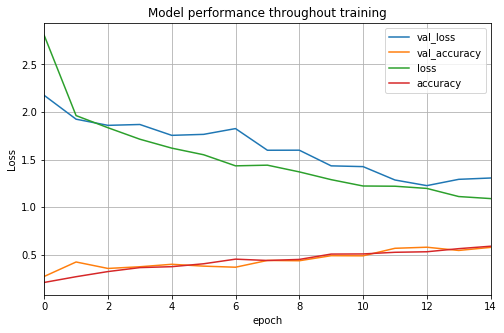

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()